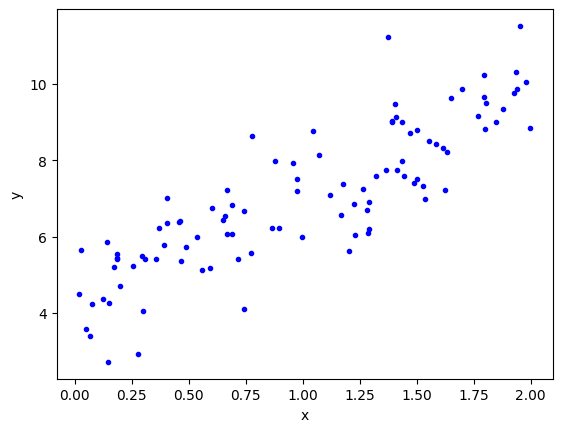

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# plot
plt.plot(X, y, "b.")
plt.xlabel("x")
plt.ylabel("y");

In [7]:
# X_b = X with bias
X_b = np.c_[np.ones((100, 1)), X]  # concat x_0 = 1 to each instance 

X_b[:4]

array([[1.        , 1.26253785],
       [1.        , 1.94062245],
       [1.        , 0.89828029],
       [1.        , 1.17659086]])

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([[4.34675646],
       [2.68998774]])

In [5]:
# (factor for x_0, factor for x_1)
theta_best

array([[4.34675646],
       [2.68998774]])

[[4.34675646]
 [7.03674421]
 [9.72673195]]


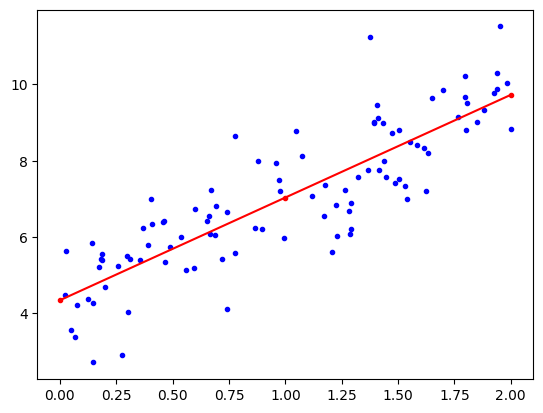

In [21]:
# new instances
X_new = np.array([[0], [1], [2]])
X_new_b = np.c_[np.ones((3, 1)), X_new]

y_pred = np.dot(X_new_b, theta_best)

print(y_pred)

plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r.", ls="-");

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.34675646]), array([[2.68998774]]))

In [20]:
lin_reg.predict(X_new)

array([[4.34675646],
       [7.03674421],
       [9.72673195]])

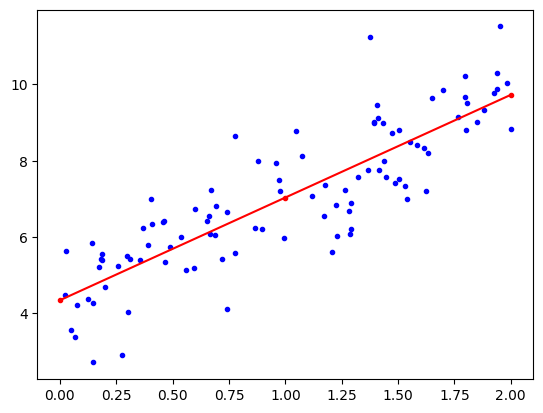

In [22]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r.", ls="-");

## Polynomial regression

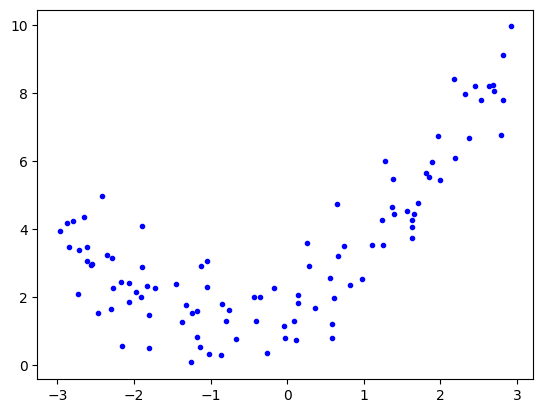

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# plot
plt.plot(X, y, "b.");

In [25]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [27]:
# (X, X**2)
X_poly[:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [30]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [39]:
# create new values for prediction
X_new = np.linspace(-3, 3, 11)
X_new = X_new.reshape((11, 1))
X_new

array([[-3. ],
       [-2.4],
       [-1.8],
       [-1.2],
       [-0.6],
       [ 0. ],
       [ 0.6],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 3. ]])

In [41]:
# transform values before preiction
X_poly_new = poly_features.transform(X_new)
X_poly_new

array([[-3.  ,  9.  ],
       [-2.4 ,  5.76],
       [-1.8 ,  3.24],
       [-1.2 ,  1.44],
       [-0.6 ,  0.36],
       [ 0.  ,  0.  ],
       [ 0.6 ,  0.36],
       [ 1.2 ,  1.44],
       [ 1.8 ,  3.24],
       [ 2.4 ,  5.76],
       [ 3.  ,  9.  ]])

In [42]:
# prediction
y_pred = lr.predict(X_poly_new)

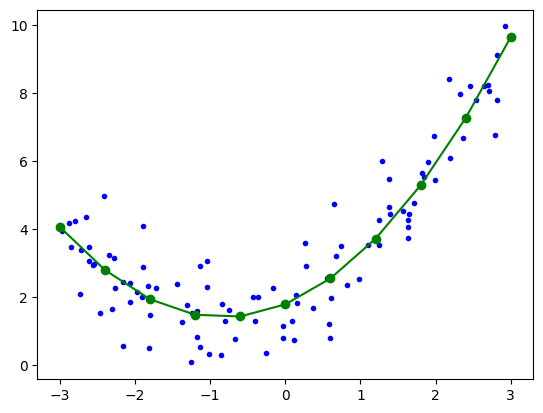

In [50]:
# plot
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "go", ls="-");

In [53]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        
        # subset
        X_set_train = X_train[:m]
        y_set_train = y_train[:m]
        
        # fitting
        model.fit(X_train[:m], y_train[:m])
        
        # train error
        y_train_predict = model.predict(X_train[:m])
        train_errors.append(mse(y_train[:m], y_train_predict))
        
        # validation error
        y_val_predict = model.predict(X_val)
        val_errors.append(mse(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", lw=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-+", lw=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

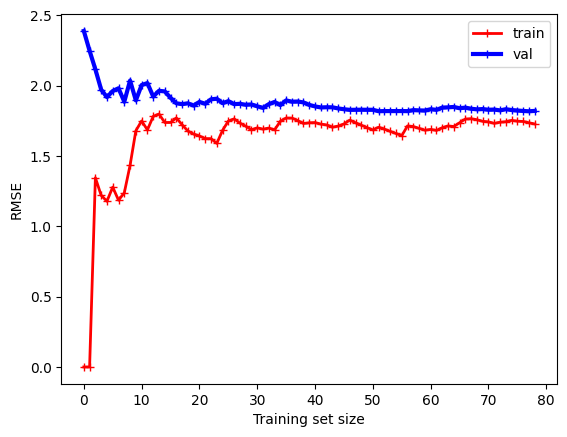

In [54]:
lr = LinearRegression()
plot_learning_curves(lr, X, y)

> This deserves a bit of explanation. First, let's look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error [ie MSE] much better or worse.
>
> Now let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.
>
> These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.
>
> If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.
>
> Geron, p 128.

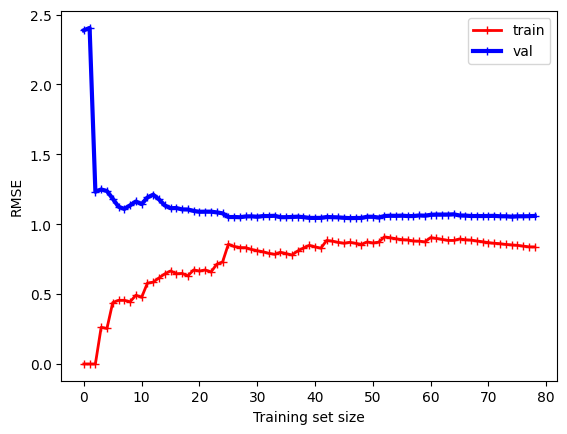

In [55]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(poly_regression, X, y)

**Bias vs variance illustrated**

![](assets/zefs_guides_bias_variance.png)

This is my interpretation of the figure:

The dataset is divided as follows:

- Four sets for training
- One set for testing
- The five sets does not share data. In other words, an instance (sample in the dataset) appears in exactly one set only.

- Train a linear model on the four training sets. As a result, four models will be generated.
- Train a polynomial model with a high degree (say, 10) on the four training sets. As a result, four models will be generated.
- Train a polynomial model with a low degree (say, 2 o 3) on the four training sets. As a result, four models will be generated.


- Measure the performance of the four linear models as follows.

1. Select a single instance of the test set.
2. Use the instance as input for the four models. You will end up with four values, for example:

```
linear_model_1(x) = 0.4
linear_model_2(x) = 0.5
linear_model_3(x) = 0.6
linear_model_4(x) = 0.4
```

In the case of the linear model, all four predictions for the same sample `x` are **similar** (close to each other). In other words, the variance of the four predictions is low (**low variance**).

Now, evaluate the whole test set on the four models and measure the error (for example, using Mean Squared Error or MSE). You will have four quantities, for example:

```
mse(linear_model_1(y_real, y_pred)) = 2.4
mse(linear_model_2(y_real, y_pred)) = 2.5
mse(linear_model_3(y_real, y_pred)) = 2.6
mse(linear_model_4(y_real, y_pred)) = 2.7
```

The four measurements are similar. That is, the performance of the four models is similar. However, the error is high. This is because we are trying to fit a linear model to a non-linear dataset (**high bias**).



- Measure the performance of the four high-degree polynomial models as follows:

1. Select a single instance of the test set.
2. Use the instance as input for the four models. You will end up with four values, for example:

```
high_degree_model_1(x) = 1.4
high_degree_model_2(x) = 3.1
high_degree_model_3(x) = 0.6
high_degree_model_4(x) = 6.2
```

In the case of the high-degree polynomial model, all four predictions for the same sample `x` are **different** (distant to each other). In other words, the variance of the four predictions is high (**high variance**).

Now, evaluate the whole test set on the four models and measure the error (for example, using Mean Squared Error or MSE). You will have four quantities, for example:

```
mse(high_degree_model_1(y_real, y_pred)) = 1.4
mse(high_degree_model_2(y_real, y_pred)) = 0.5
mse(high_degree_model_3(y_real, y_pred)) = 1.6
mse(high_degree_model_4(y_real, y_pred)) = 0.7
```

The four measurements are somewhat similar. Also, the error is somewhat low.  (**low bias**). I am not sure if four overfitted models can lead to high bias.





- Measure the performance of the four low-degree polynomial models as follows:

1. Select a single instance of the test set.
2. Use the instance as input for the four models. You will end up with four values, for example:

```
low_degree_model_1(x) = 1.4
low_degree_model_2(x) = 1.5
low_degree_model_3(x) = 1.6
low_degree_model_4(x) = 1.3
```

In the case of the low-degree polynomial model, all four predictions for the same sample `x` are **similar** (close to each other). In other words, the variance of the four predictions is low (**low variance**). Low variance means that the predictions made by the four models are consistent.

Now, evaluate the whole test set on the four models and measure the error (for example, using Mean Squared Error or MSE). You will have four quantities, for example:

```
mse(low_degree_model_1(y_real, y_pred)) = 0.4
mse(low_degree_model_2(y_real, y_pred)) = 0.5
mse(low_degree_model_3(y_real, y_pred)) = 0.6
mse(low_degree_model_4(y_real, y_pred)) = 0.7
```

The four measurements are similar. That is, the performance of the four models is similar. Also, the error is low **low bias**).

**low variance and low bias** means that the four predictions made by the models on the same test instance are consistent (does not vary significantly) and also means that the error is low (low bias). This is the ideal case.

**low variance and high bias** means that the four predictions made by the models on the same test instance are consistent (does not vary significantly). However, it also means that the error is high. In order to tackle the high bias (ie to reduce the error), you can [Geron page 128]:

- use a more complex model
- add more features
- adding more training instances will not help

**high variance and low bias** means that the four predictions made by the models on the same test instance are really distinct (vary significantly). That is, the predictions are not consistent (we do not want that!). However, the error is low (low bias). In order to tackle the high variance:




[zefsguides.com](https://zefsguides.com)

[Bias vs variance](https://old.reddit.com/r/learnmachinelearning/comments/w3rwxm/how_to_measure_bias_and_variance_in_ml_models)

![](assets/zefs_guides_bias_variance.png)


More discussion about bias vs variance, and underfitting vs overfitting


- [Geron p 482, 484]

> 15 If a model performs great on the training data but generalizes poorly to new instances, the model is likely overtiffing the training data (or we got extremely lucky on the training data).

CONTINUA AGREGANDO ESTO y las notas de learning curves (podrias )


COPIA LA FIGURA DE AGGARWAL

whereas the polynomial model changes drastically [ie it is modeling the noise, it is sensible to the noise]


https://gitlab.com/auraham/deep_learning_with_python/-/blob/master/definitions_questions.md


crear repo machine_learning_topics



## TODO

- Baseline: media de las ultimas 2 instancias
- Baseline: media de las ultimas 5 instancias
- Normalizar/Estandarizar datos
- Agregar una columna que represente el tiempo/secuencia en dias/minutos o algo
- Agregar regularizacion
- Data augmentation?

## References

- [Geron] Hands-on machine learning with scikit-learn and tensorflow, first edition.

- [Bias vs variance](https://old.reddit.com/r/learnmachinelearning/comments/w3rwxm/how_to_measure_bias_and_variance_in_ml_models/)